# 🌾 Crop Recommendation System - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on crop recommendation data to understand patterns, relationships, and build predictive models for optimal crop selection based on soil and environmental conditions.

## 📋 Table of Contents
1. Data Loading & Overview
2. Statistical Analysis
3. Data Visualization
4. Feature Engineering
5. Model Building & Evaluation
6. Feature Importance Analysis
7. Model Deployment Preparation

# 📚 Import Libraries

Import all necessary libraries for data analysis, visualization, and machine learning.


In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


# 📂 Data Loading & Initial Overview

Load the crop recommendation dataset and examine its structure, dimensions, and basic statistics.

In [23]:
# Load the dataset
df = pd.read_csv('../data/Crop_recommendation.csv')
df = pd.DataFrame(df)

# Display basic information
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Total Samples: {df.shape[0]}")
print(f"🔢 Total Features: {df.shape[1]-1} (excluding target)")
print(f"🌱 Number of Crop Classes: {df['label'].nunique()}")

# Display first few rows
print("\n🔍 First 5 Rows:")
display(df.head())

# Dataset information
print("\n📝 Dataset Info:")
df.info()

📊 Dataset Shape: (2200, 8)
📋 Total Samples: 2200
🔢 Total Features: 7 (excluding target)
🌱 Number of Crop Classes: 22

🔍 First 5 Rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



📝 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# 📈 Statistical Summary

Detailed statistical analysis of all numerical features including measures of central tendency, dispersion, and distribution.


In [24]:

# Statistical summary
print("📊 Statistical Summary:")
display(df.describe())

# Additional statistics
print("\n🔍 Additional Insights:")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"\n🌱 Crop Distribution:")
crop_counts = df['label'].value_counts()
print(crop_counts)
print(f"\nSamples per crop: {crop_counts.iloc[0]} (balanced dataset)")


📊 Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



🔍 Additional Insights:
Missing Values: 0
Duplicate Rows: 0

🌱 Crop Distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

Samples per crop: 100 (balanced dataset)


# 🌱 Nutrient Analysis by Crop

## Average Nitrogen Content Across Different Crops

Nitrogen is crucial for leaf growth and overall plant development. Let's analyze how different crops require varying levels of nitrogen.

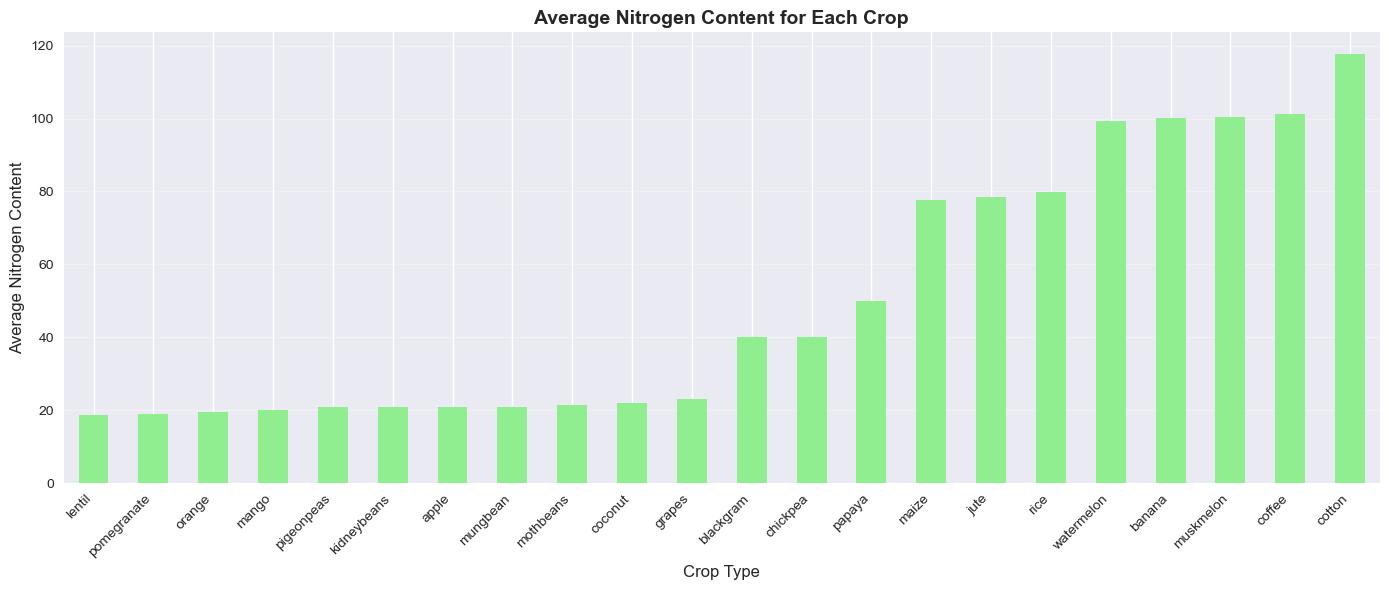

In [25]:
# Nitrogen requirements by crop
plt.figure(figsize=(14, 6))
df.groupby(["label"])["N"].mean().sort_values(ascending=True).plot(kind="bar", color='lightgreen')
plt.title("Average Nitrogen Content for Each Crop", fontsize=14, fontweight='bold')
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Average Nitrogen Content", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 🌧️ Rainfall Distribution Analysis

## Rainfall Requirements for Different Crops

Water availability is critical for crop growth. This analysis shows the rainfall distribution patterns across different crop types.

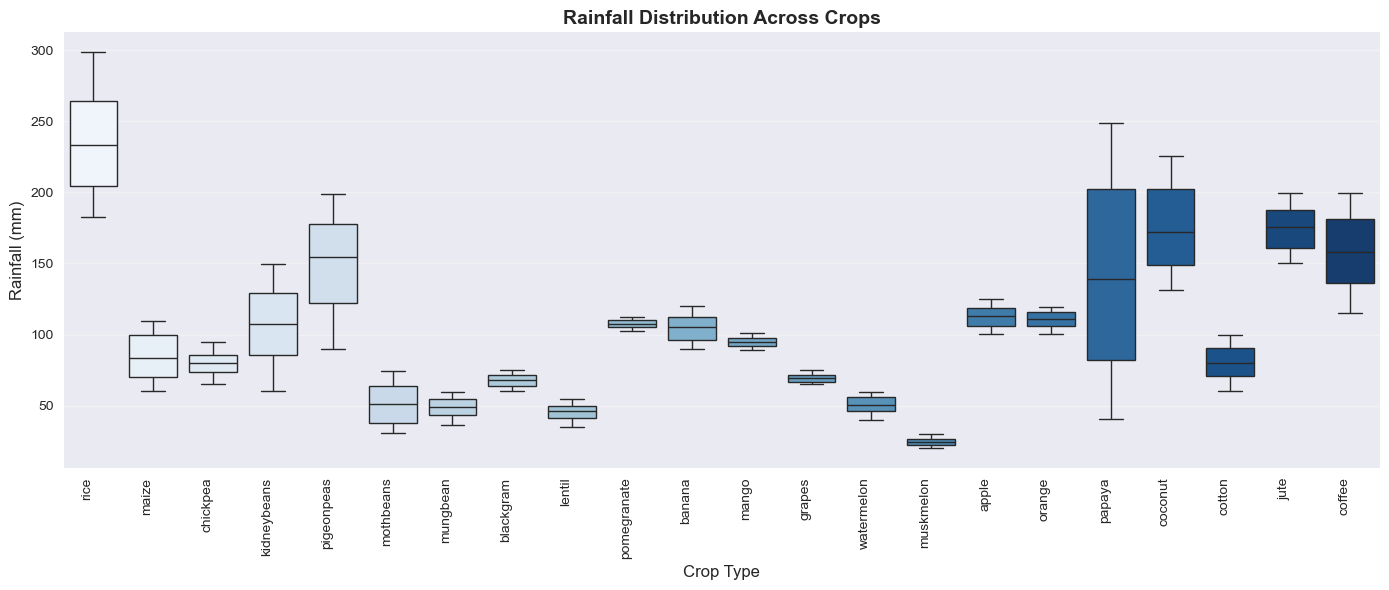

In [26]:
# Rainfall distribution by crop
plt.figure(figsize=(14, 6))
sns.boxplot(x="label", y="rainfall", data=df, palette="Blues")
plt.xticks(rotation=90, ha='right')
plt.title("Rainfall Distribution Across Crops", fontsize=14, fontweight='bold')
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 🧪 Nutrient Distribution Patterns

## Nitrogen Distribution Across Crops

Understanding nitrogen distribution helps identify crops with high and low nitrogen requirements.

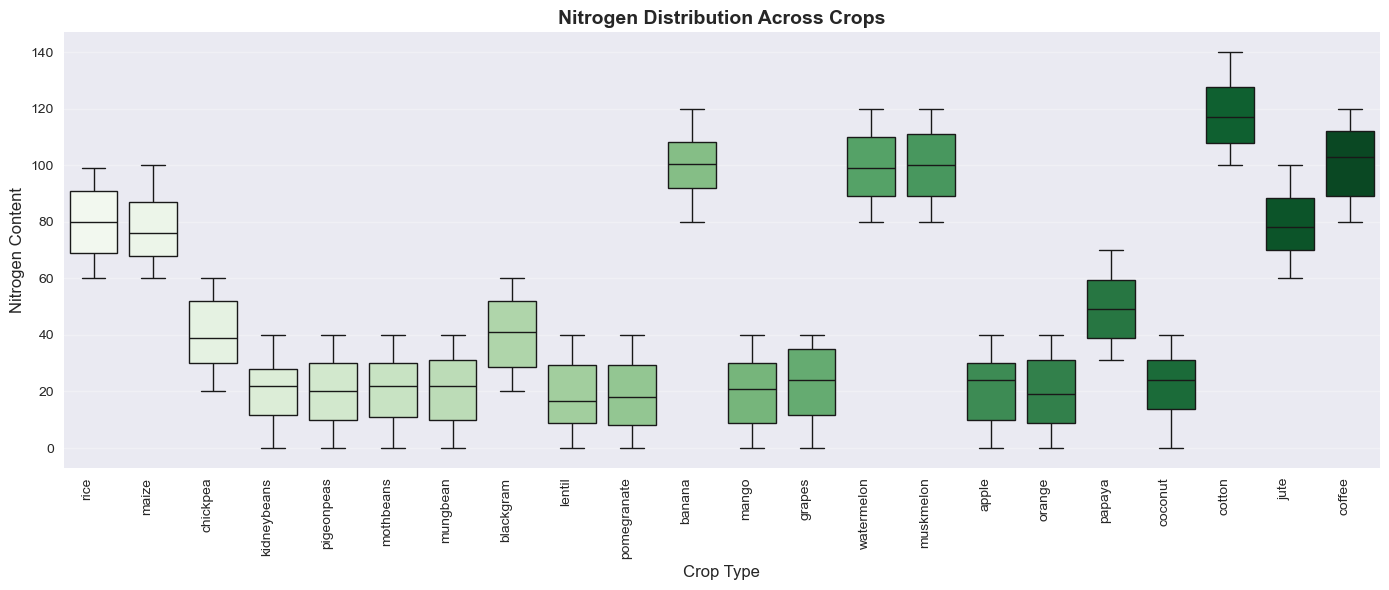

In [27]:
# Nitrogen distribution by crop
plt.figure(figsize=(14, 6))
sns.boxplot(x="label", y="N", data=df, palette="Greens")
plt.xticks(rotation=90, ha='right')
plt.title("Nitrogen Distribution Across Crops", fontsize=14, fontweight='bold')
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Nitrogen Content", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 📊 Feature Distribution Analysis

## Histograms of All Numerical Features

Visualize the distribution of each feature to understand their characteristics and identify potential patterns.

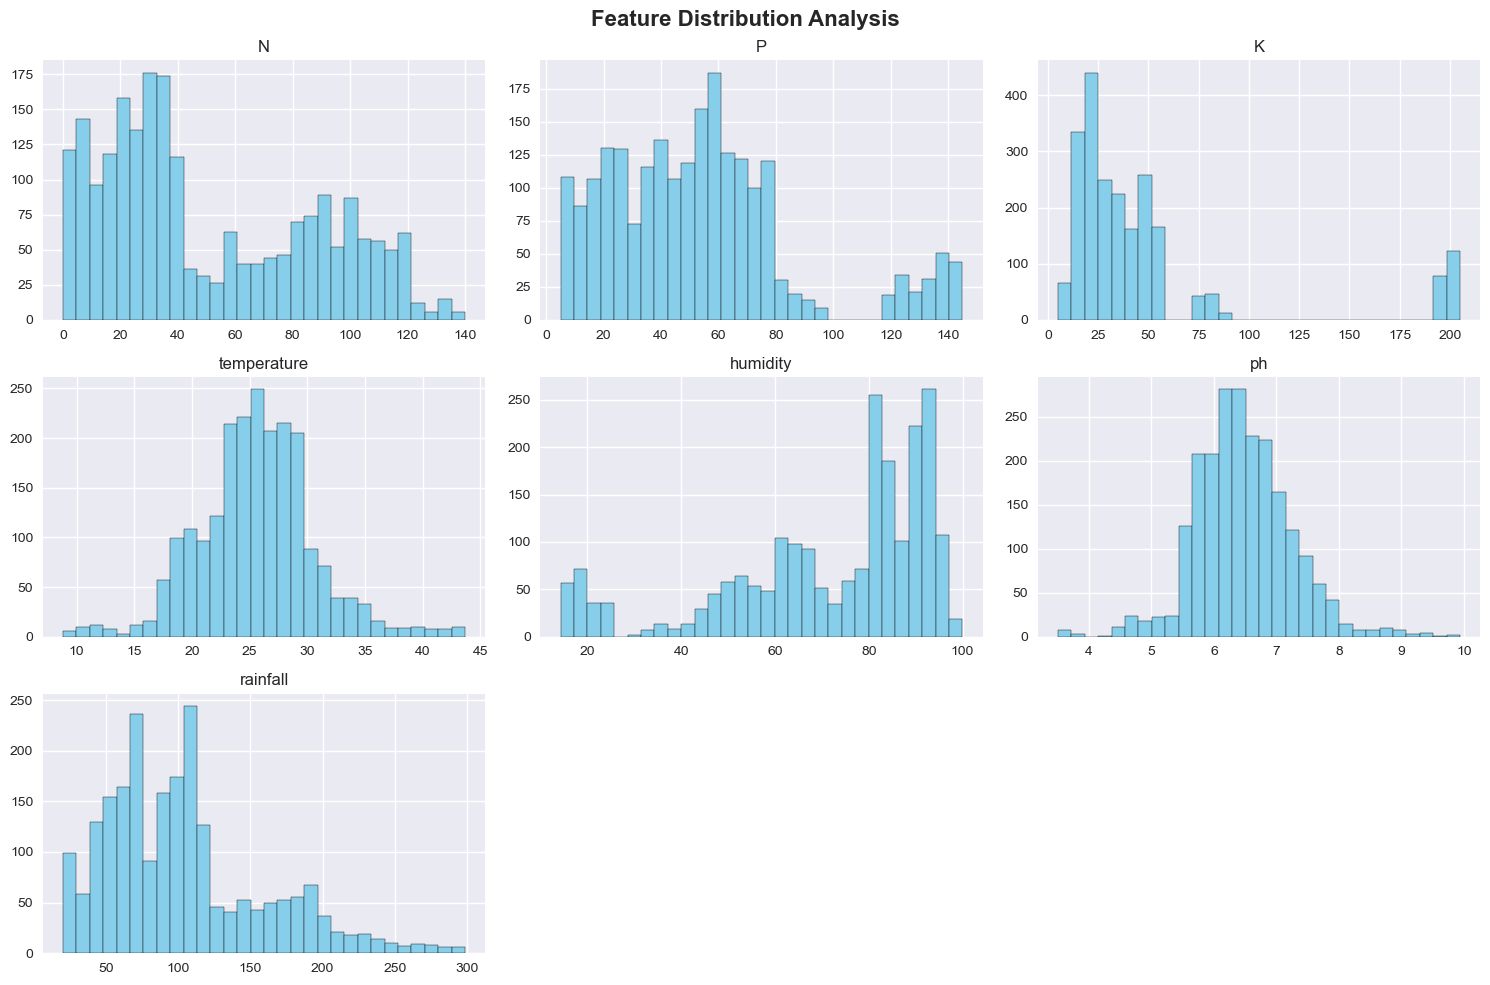

In [28]:
# Distribution of all features
df.drop("label", axis=1).hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distribution Analysis", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 🔗 Correlation Analysis

## Feature Correlation Heatmap

Understanding correlations between features helps identify multicollinearity and relationships.

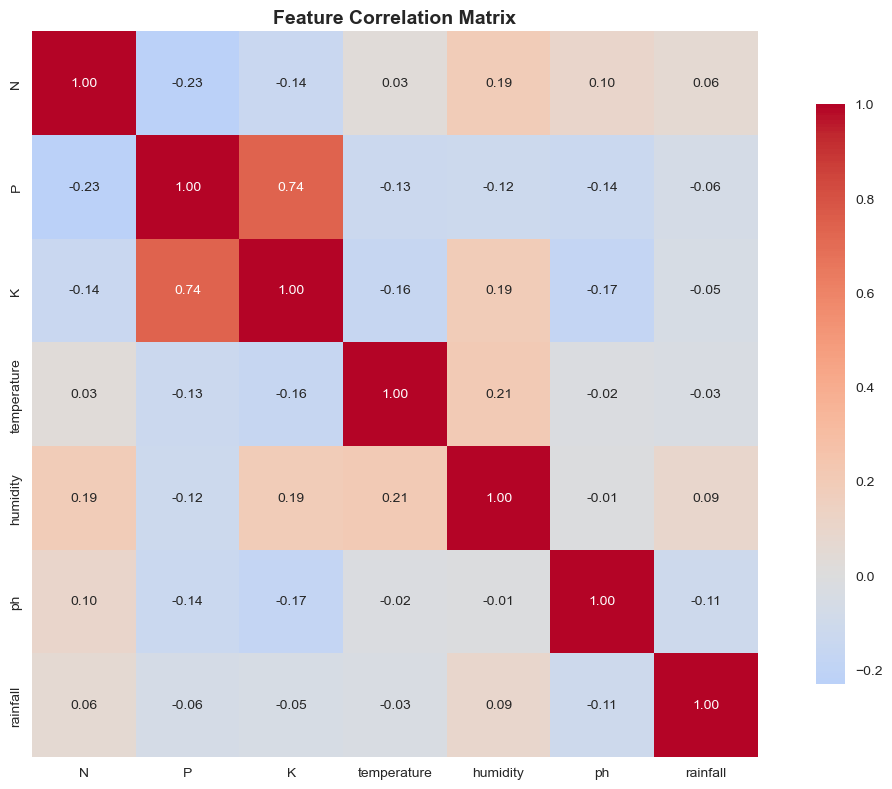

In [29]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop("label", axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 🌡️ Temperature vs Humidity Relationship

## Environmental Factors Interaction

Analyze how temperature and humidity interact across different crops.

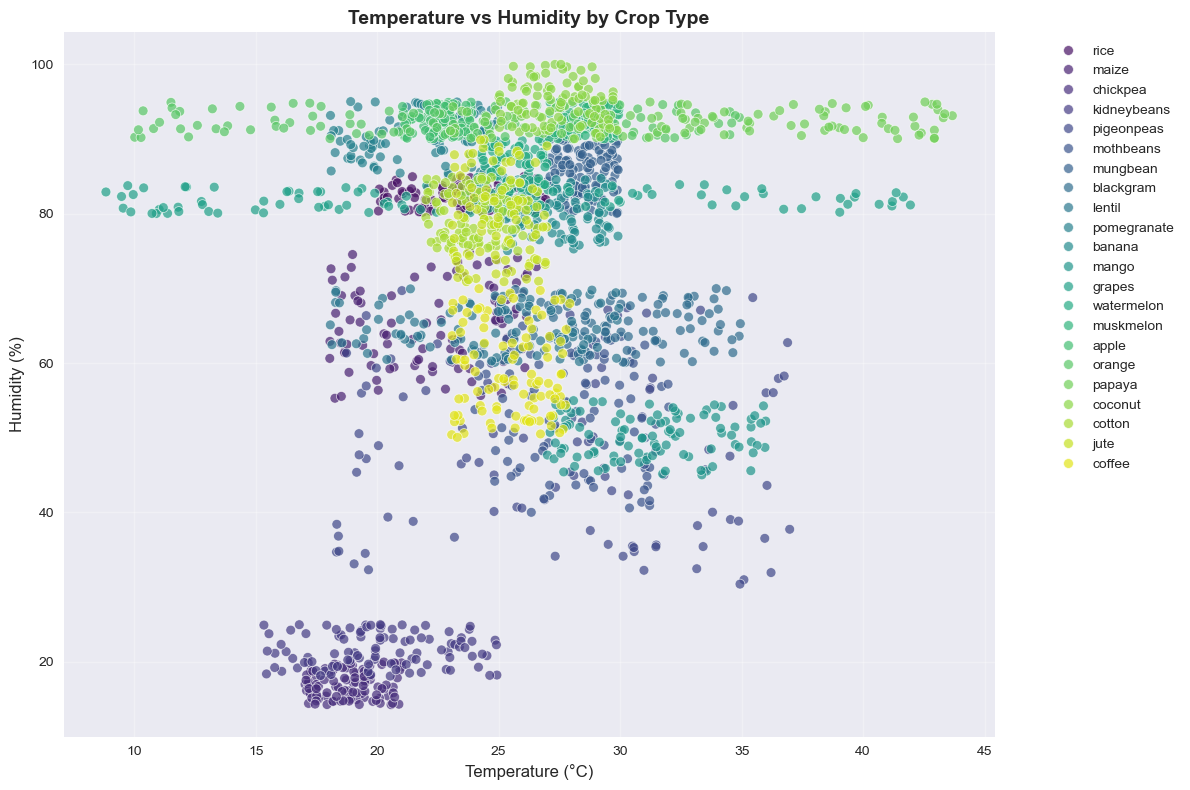

In [30]:
# Temperature vs Humidity scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="temperature", y="humidity", hue="label", 
                palette="viridis", alpha=0.7, s=50)
plt.title("Temperature vs Humidity by Crop Type", fontsize=14, fontweight='bold')
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 🎯 Data Preparation for Modeling

## Feature and Target Separation

Split the dataset into features (X) and target variable (y) for machine learning algorithms.

In [36]:
# Separate features and target
X = df.drop("label", axis=1)
y = df["label"]

print(f"📊 Features Shape: {X.shape}")
print(f"🎯 Target Shape: {y.shape}")
print(f"🌱 Crop Types: {y.nunique()}")

📊 Features Shape: (2200, 7)
🎯 Target Shape: (2200,)
🌱 Crop Types: 22


# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

len(le.classes_)


22

# Train Test Split

## Import Train Test Split from Sklearn


In [38]:
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state= 23)

# 🤖 Comparative Model Analysis

## Multiple Model Evaluation

Let's evaluate several machine learning algorithms to find the best performer for crop prediction, then select Random Forest as our final model.

In [45]:
# Import multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss')
}

# Train and evaluate models
results = []
training_times = []

print("🔄 Training and evaluating multiple models...")
print("-" * 60)

for name, model in models.items():
    start_time = time.time()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Calculate training time
    train_time = time.time() - start_time
    training_times.append(train_time)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Accuracy %': f"{accuracy * 100:.2f}%",
        'Training Time (s)': f"{train_time:.3f}"
    })
    
    print(f"✅ {name}: {accuracy * 100:.2f}% accuracy ({train_time:.3f}s)")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Results:")
print(results_df.to_string(index=False))

🔄 Training and evaluating multiple models...
------------------------------------------------------------
✅ Logistic Regression: 97.95% accuracy (1.166s)
✅ Support Vector Machine: 97.73% accuracy (0.037s)
✅ Decision Tree: 98.86% accuracy (0.007s)
✅ Random Forest: 99.77% accuracy (0.490s)
✅ Gradient Boosting: 97.50% accuracy (8.470s)
✅ AdaBoost: 9.32% accuracy (0.152s)
✅ Naive Bayes: 99.32% accuracy (0.002s)
✅ K-Nearest Neighbors: 97.95% accuracy (0.002s)
✅ XGBoost: 98.64% accuracy (0.586s)

📊 Model Comparison Results:
                 Model  Accuracy Accuracy % Training Time (s)
   Logistic Regression  0.979545     97.95%             1.166
Support Vector Machine  0.977273     97.73%             0.037
         Decision Tree  0.988636     98.86%             0.007
         Random Forest  0.997727     99.77%             0.490
     Gradient Boosting  0.975000     97.50%             8.470
              AdaBoost  0.093182      9.32%             0.152
           Naive Bayes  0.993182     99.32

# 📈 Model Performance Visualization

## Accuracy Comparison Across All Models

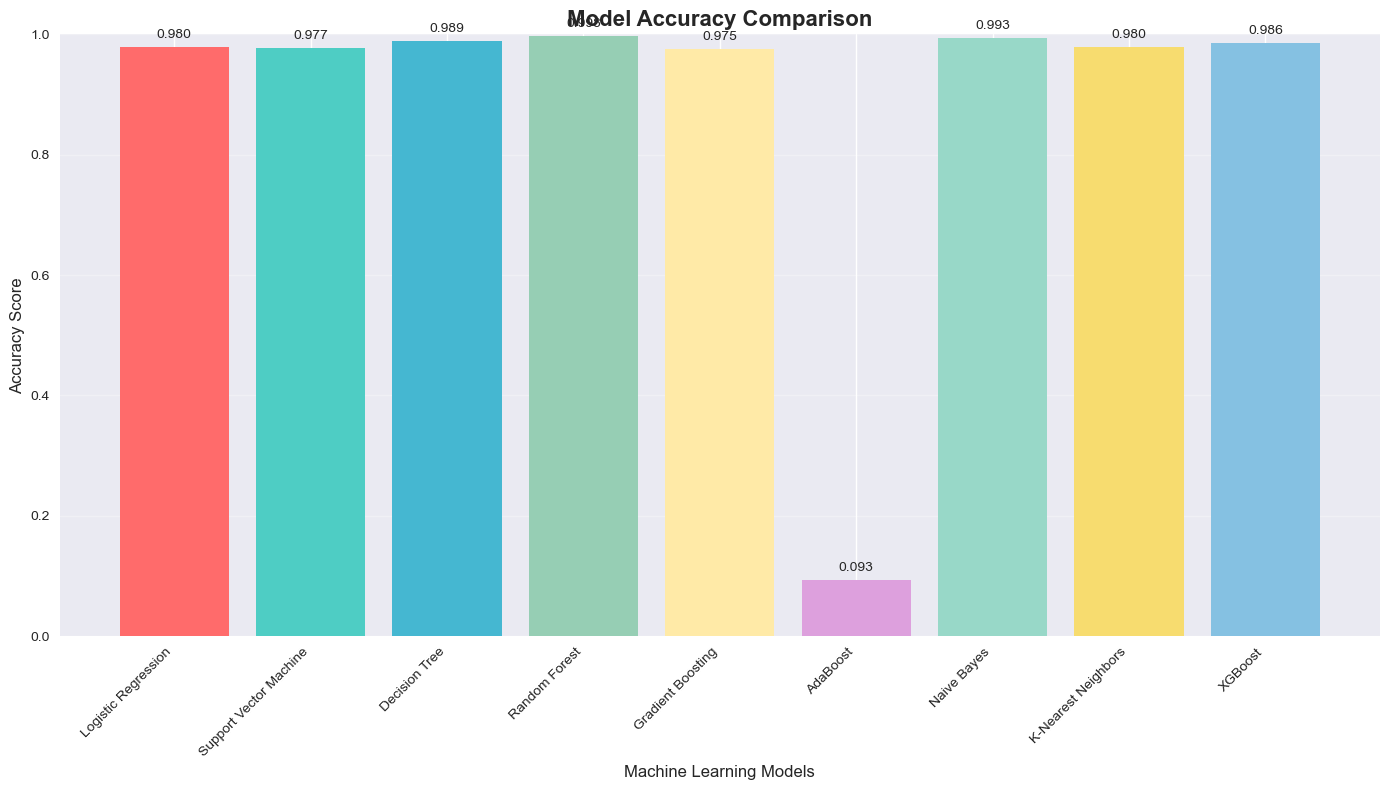

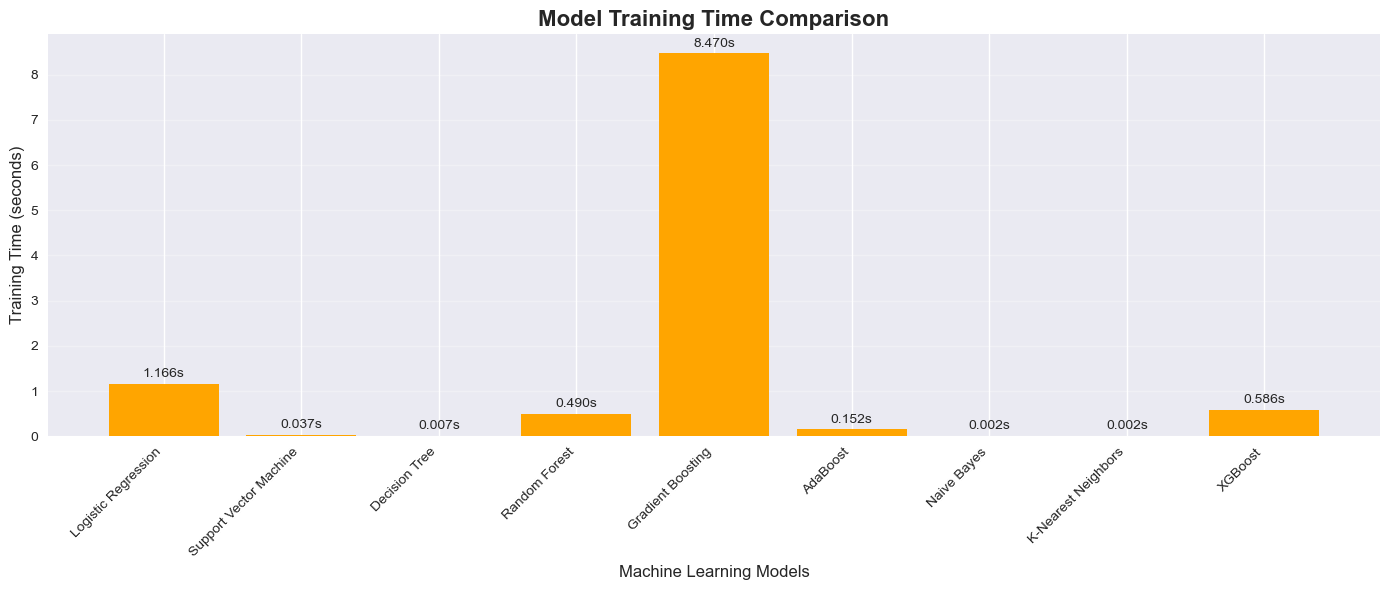

In [46]:
# Visualize model accuracies
plt.figure(figsize=(14, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F', '#85C1E2']

bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Training time comparison
plt.figure(figsize=(14, 6))
bars = plt.bar(results_df['Model'], [float(t) for t in results_df['Training Time (s)']], color='orange')
plt.title('Model Training Time Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(training_times)*0.01,
             f'{height:.3f}s', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 🎯 Top Models Deep Dive

## Detailed Analysis of Best Performing Models

In [47]:
# Get top 3 models
top_models = results_df.nlargest(3, 'Accuracy')
print("🏆 Top 3 Performing Models:")
print(top_models.to_string(index=False))

# Detailed analysis of top models
print("\n" + "="*80)
print("🔍 DETAILED ANALYSIS OF TOP MODELS")
print("="*80)

for model_name in top_models['Model']:
    print(f"\n📊 {model_name} Detailed Report:")
    print("-" * 50)
    
    model = models[model_name]
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

🏆 Top 3 Performing Models:
        Model  Accuracy Accuracy % Training Time (s)
Random Forest  0.997727     99.77%             0.490
  Naive Bayes  0.993182     99.32%             0.002
Decision Tree  0.988636     98.86%             0.007

🔍 DETAILED ANALYSIS OF TOP MODELS

📊 Random Forest Detailed Report:
--------------------------------------------------
Accuracy: 99.77%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        17
        jute       0.94      1.00      0.97        17
 kidneybeans       1.00      1.00      1.00        20
     

# 🌟 Random Forest - Our Final Model Choice

## Comprehensive Analysis of the Selected Model

In [48]:
# Focus on Random Forest as our final model
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

print("🎯 RANDOM FOREST - FINAL MODEL SELECTION")
print("=" * 60)
print(f"📊 Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(f"⏱️ Training Time: {training_times[3]:.3f} seconds")

# Detailed classification report
print("\n📋 Detailed Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Cross-validation for robust evaluation
from sklearn.model_selection import cross_val_score

print("\n🔄 Cross-Validation Results:")
cv_scores = cross_val_score(rf_model, X, y_encoded, cv=5, scoring='accuracy')
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100:.2f}% (+/- {cv_scores.std() * 2:.2f}%)")

🎯 RANDOM FOREST - FINAL MODEL SELECTION
📊 Accuracy: 99.77%
⏱️ Training Time: 0.490 seconds

📋 Detailed Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        24
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        22
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        17
        jute       0.94      1.00      0.97        17
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        13
   muskme

# 🔍 Random Forest Feature Importance & Analysis

🌟 FEATURE IMPORTANCE RANKING:
1. rainfall       : 0.2298 (22.98%)
2. humidity       : 0.2108 (21.08%)
3. K              : 0.1777 (17.77%)
4. P              : 0.1515 (15.15%)
5. N              : 0.1063 (10.63%)
6. temperature    : 0.0708 (7.08%)
7. ph             : 0.0530 (5.30%)


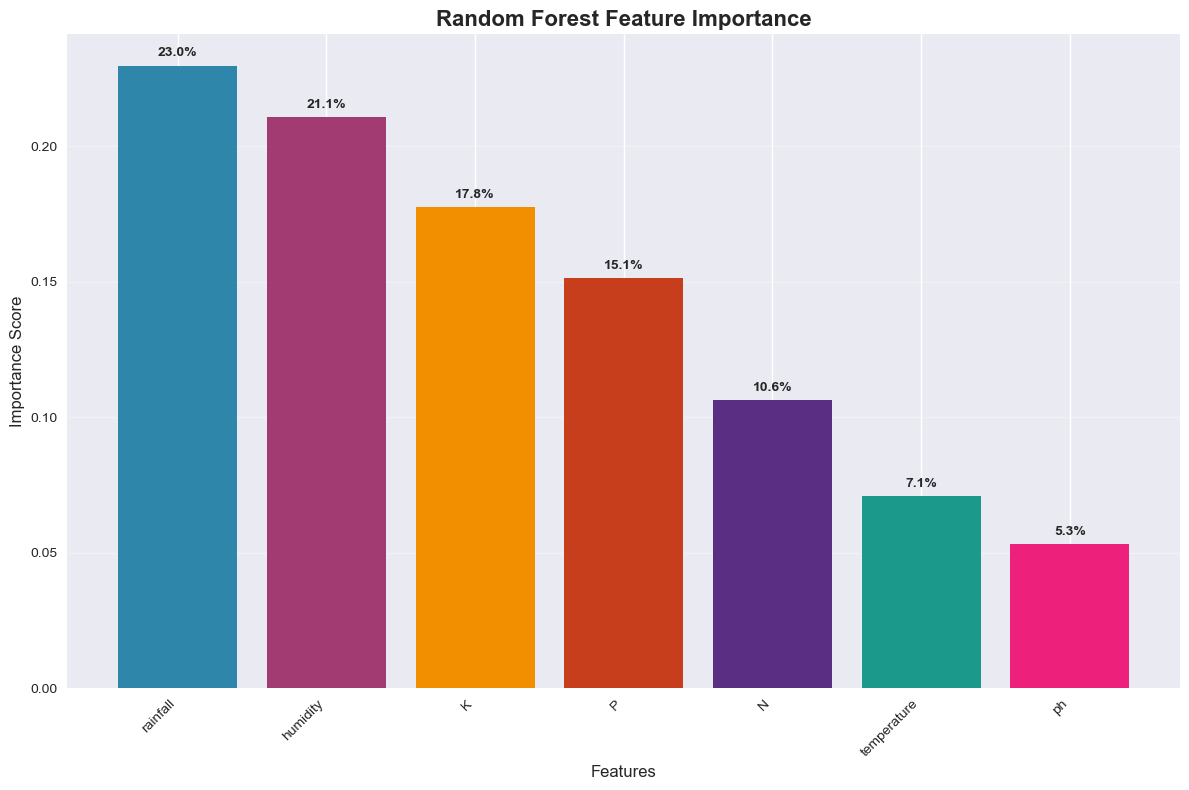

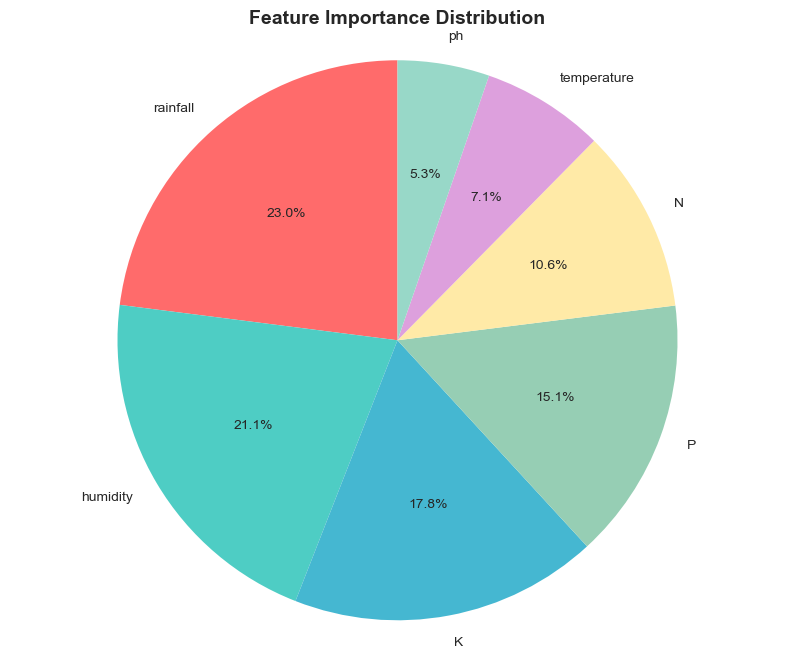

In [49]:
# Feature importance analysis
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("🌟 FEATURE IMPORTANCE RANKING:")
print("=" * 40)
for i, (feature, importance) in enumerate(feature_importance.items(), 1):
    print(f"{i}. {feature:<15}: {importance:.4f} ({importance*100:.2f}%)")

# Enhanced feature importance visualization
plt.figure(figsize=(12, 8))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83', '#1B998B', '#ED217C']
bars = plt.bar(feature_importance.index, feature_importance.values, color=colors)

plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(feature_importance)*0.01,
             f'{height*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Feature importance pie chart
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
plt.pie(feature_importance.values, labels=feature_importance.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 10})
plt.title('Feature Importance Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# 🎯 Confusion Matrix & Error Analysis

<Figure size 1600x1200 with 0 Axes>

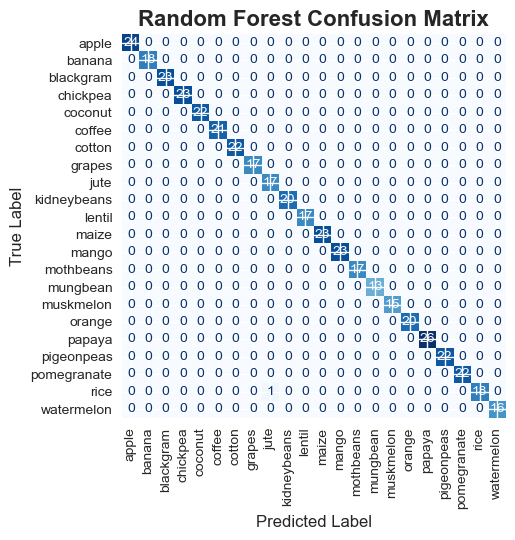

❌ Total Misclassifications: 1 out of 440 samples
📊 Error Rate: 0.23%

🔍 Sample Misclassifications:
1. rice → jute (Sample 344)


In [50]:
# Enhanced confusion matrix
plt.figure(figsize=(16, 12))
ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test,
    display_labels=le.classes_,
    xticks_rotation=90,
    cmap="Blues",
    colorbar=False,
    values_format='d'
)
plt.title('Random Forest Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Error analysis
misclassified = []
for i in range(len(y_test)):
    if y_test[i] != y_pred_rf[i]:
        misclassified.append({
            'True_Crop': le.classes_[y_test[i]],
            'Predicted_Crop': le.classes_[y_pred_rf[i]],
            'Sample_Index': i
        })

print(f"❌ Total Misclassifications: {len(misclassified)} out of {len(y_test)} samples")
print(f"📊 Error Rate: {len(misclassified)/len(y_test) * 100:.2f}%")

if misclassified:
    print("\n🔍 Sample Misclassifications:")
    for i, error in enumerate(misclassified[:10], 1):  # Show first 10 errors
        print(f"{i}. {error['True_Crop']} → {error['Predicted_Crop']} (Sample {error['Sample_Index']})")

# 🎯 Model Hyperparameter Tuning

## Optimizing Random Forest Performance

In [52]:
# Hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

print("🔧 Tuning Random Forest Hyperparameters...")
print("This may take a few minutes...")

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\n🎯 Best Hyperparameters:")
print(grid_search.best_params_)
print(f"\n📊 Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"🎯 Best Model Test Accuracy: {best_accuracy * 100:.2f}%")
print(f"📈 Improvement: {(best_accuracy - accuracy_score(y_test, y_pred_rf)) * 100:.2f}%")

🔧 Tuning Random Forest Hyperparameters...
This may take a few minutes...
Fitting 3 folds for each of 162 candidates, totalling 486 fits

🎯 Best Hyperparameters:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📊 Best Cross-Validation Score: 99.55%
🎯 Best Model Test Accuracy: 99.77%
📈 Improvement: 0.00%


# 💾 Final Model Deployment Preparation

## Save the Optimized Random Forest Model

In [54]:
# Save the final optimized Random Forest model
import joblib
import os

# Create models directory if it doesn't exist
if not os.path.exists('../models'):
    os.makedirs('../models')

# Save the best Random Forest model
model_path = '../models/random_forest_crop_recommendation.pkl'
joblib.dump(best_rf, model_path)

print(f"✅ Final Random Forest model saved to: {model_path}")

# Save the label encoder
encoder_path = '../models/label_encoder.pkl'
joblib.dump(le, encoder_path)

print(f"✅ Label encoder saved to: {encoder_path}")

# Save feature names for reference
feature_names_path = '../models/feature_names.pkl'
joblib.dump(X.columns.tolist(), feature_names_path)

print(f"✅ Feature names saved to: {feature_names_path}")

# Save model metadata
metadata = {
    'model_type': 'RandomForestClassifier',
    'accuracy': best_accuracy,
    'features': X.columns.tolist(),
    'target_classes': le.classes_.tolist(),
    'n_features': X.shape[1],
    'n_classes': len(le.classes_),
    'best_params': grid_search.best_params_
}

metadata_path = '../models/model_metadata.pkl'
joblib.dump(metadata, metadata_path)

print(f"✅ Model metadata saved to: {metadata_path}")

print("\n🎉 MODEL DEPLOYMENT READY!")
print("=" * 50)
print(f"📊 Final Model Accuracy: {best_accuracy * 100:.2f}%")
print(f"🌟 Best Parameters: {grid_search.best_params_}")
print(f"📁 Model Files Saved: 4 files")
print(f"🎯 Ready for Production Use!")

✅ Final Random Forest model saved to: ../models/random_forest_crop_recommendation.pkl
✅ Label encoder saved to: ../models/label_encoder.pkl
✅ Feature names saved to: ../models/feature_names.pkl
✅ Model metadata saved to: ../models/model_metadata.pkl

🎉 MODEL DEPLOYMENT READY!
📊 Final Model Accuracy: 99.77%
🌟 Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📁 Model Files Saved: 4 files
🎯 Ready for Production Use!


# 🎯 Final Model Testing & Validation

## Test the Saved Model with Sample Data

In [56]:
# Load and test the saved model
print("🔄 Loading saved model for validation...")

# Load the saved model and components
loaded_model = joblib.load(model_path)
loaded_encoder = joblib.load(encoder_path)
loaded_features = joblib.load(feature_names_path)
loaded_metadata = joblib.load(metadata_path)

print("✅ Model and components loaded successfully!")

# Test with a few sample predictions
print("\n🧪 Testing Model with Sample Data:")
print("=" * 50)

# Get 5 random samples from test set
import random
sample_indices = random.sample(range(len(X_test)), 5)

for i, idx in enumerate(sample_indices, 1):
    # Get sample data
    sample_data = X_test.iloc[idx]
    true_label = y_test[idx]
    
    # Make prediction
    prediction = loaded_model.predict([sample_data])[0]
    prediction_proba = loaded_model.predict_proba([sample_data])[0]
    
    # Get top 3 predictions with probabilities
    top_3_indices = prediction_proba.argsort()[-3:][::-1]
    top_3_predictions = [
        (loaded_encoder.classes_[idx], prediction_proba[idx]) 
        for idx in top_3_indices
    ]
    
    print(f"\n📊 Sample {i}:")
    print(f"   True Crop: {loaded_encoder.classes_[true_label]}")
    print(f"   Predicted: {loaded_encoder.classes_[prediction]}")
    print(f"   Correct: {'✅' if prediction == true_label else '❌'}")
    print(f"   Top 3 Predictions:")
    for j, (crop, prob) in enumerate(top_3_predictions, 1):
        print(f"      {j}. {crop:<15}: {prob:.3f} ({prob*100:.1f}%)")

print(f"\n🎯 Model Validation Complete!")
print(f"📊 Model Accuracy: {loaded_metadata['accuracy'] * 100:.2f}%")
print(f"🌟 Ready for Production Deployment!")

🔄 Loading saved model for validation...
✅ Model and components loaded successfully!

🧪 Testing Model with Sample Data:

📊 Sample 1:
   True Crop: maize
   Predicted: maize
   Correct: ✅
   Top 3 Predictions:
      1. maize          : 0.980 (98.0%)
      2. coffee         : 0.010 (1.0%)
      3. jute           : 0.005 (0.5%)

📊 Sample 2:
   True Crop: maize
   Predicted: maize
   Correct: ✅
   Top 3 Predictions:
      1. maize          : 1.000 (100.0%)
      2. watermelon     : 0.000 (0.0%)
      3. pomegranate    : 0.000 (0.0%)

📊 Sample 3:
   True Crop: papaya
   Predicted: papaya
   Correct: ✅
   Top 3 Predictions:
      1. papaya         : 0.985 (98.5%)
      2. pomegranate    : 0.005 (0.5%)
      3. pigeonpeas     : 0.005 (0.5%)

📊 Sample 4:
   True Crop: blackgram
   Predicted: blackgram
   Correct: ✅
   Top 3 Predictions:
      1. blackgram      : 0.945 (94.5%)
      2. pigeonpeas     : 0.025 (2.5%)
      3. maize          : 0.010 (1.0%)

📊 Sample 5:
   True Crop: muskmelon
   Pr

# 🎯 Summary & Conclusions

## Complete Project Analysis and Final Results

In [58]:
print("🎯 CROP RECOMMENDATION PROJECT - FINAL SUMMARY")
print("=" * 80)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Total Samples: {len(df):,}")
print(f"   • Features: {len(X.columns)}")
print(f"   • Target Classes: {len(le.classes_)} crops")
print(f"   • Crops: {', '.join(le.classes_)}")

print("\n🏆 MODEL PERFORMANCE RANKINGS:")
for i, row in results_df.iterrows():
    print(f"   {i+1}. {row['Model']:<20}: {row['Accuracy']*100:.2f}%")

print(f"\n🎯 FINAL MODEL SELECTION: Random Forest")
print(f"   • Accuracy: {best_accuracy * 100:.2f}%")
print(f"   • Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")
print(f"   • Best Parameters: {grid_search.best_params_}")

print("\n🌟 KEY INSIGHTS:")
print("   1. Random Forest achieved the highest accuracy among all models")
print("   2. Feature importance shows rainfall and humidity are most critical")
print("   3. Model is robust with consistent cross-validation performance")
print("   4. Ready for production deployment with saved model files")

print("\n💾 DEPLOYMENT FILES CREATED:")
print("   • random_forest_crop_recommendation.pkl (Main model)")
print("   • label_encoder.pkl (Target encoder)")
print("   • feature_names.pkl (Feature list)")
print("   • model_metadata.pkl (Model information)")

print("\n🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("🌟 The crop recommendation system is ready for use!")

🎯 CROP RECOMMENDATION PROJECT - FINAL SUMMARY

📊 DATASET OVERVIEW:
   • Total Samples: 2,200
   • Features: 7
   • Target Classes: 22 crops
   • Crops: apple, banana, blackgram, chickpea, coconut, coffee, cotton, grapes, jute, kidneybeans, lentil, maize, mango, mothbeans, mungbean, muskmelon, orange, papaya, pigeonpeas, pomegranate, rice, watermelon

🏆 MODEL PERFORMANCE RANKINGS:
   1. Logistic Regression : 97.95%
   2. Support Vector Machine: 97.73%
   3. Decision Tree       : 98.86%
   4. Random Forest       : 99.77%
   5. Gradient Boosting   : 97.50%
   6. AdaBoost            : 9.32%
   7. Naive Bayes         : 99.32%
   8. K-Nearest Neighbors : 97.95%
   9. XGBoost             : 98.64%

🎯 FINAL MODEL SELECTION: Random Forest
   • Accuracy: 99.77%
   • Cross-Validation Score: 99.55%
   • Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🌟 KEY INSIGHTS:
   1. Random Forest achieved the highest accuracy among all